# Bike Sharing Assignment - Upgrad (BoomBikes)

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted us to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Steps Taken (table of content) :- 

- Step 0 - Importing libraries
- Step 1 - Reading and understanding the data
- Step 2 - EDA
- Step 3 - Visualising the data
- Step 4 - Visualizing the correlation
- Step 5 - Dummy variable's management
- Step 6 - Prepare train data
- Step 7 - Building Model
- Step 8 - Check for actual and predicted values
- Step 9 - Use RFE for feature selection approach
- Step 10 - Check VIF
- Step 11 - Residual analysis on train data
- Step 12 - Make prediction based on findings from above model created
- Step 13 - Evaluation of the Model created
- Step 14 - Findings on data based on above steps/ model 

### Step 0 - Importing libraries

In [1]:

# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import r2_score


pd.set_option("display.max_columns",None)


### Step 1 - Reading and understanding the data

In [2]:
# read csv

df = pd.read_csv('day.csv')

### Step 2 - EDA

In [3]:
#shape of df
df.shape

(730, 16)

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# check for null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

from above step it's clear their are no null values

In [8]:
# check for duplicates

df.duplicated().sum()

0

from above step it's clear their are no duplicates present

In [9]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
# their are certain columns which are not required hence dropping them 
df.drop(['instant','dteday','casual','registered','holiday'],axis=1,inplace=True)

where 

- instant: record index
- dteday : date
- casual: count of casual users
- registered: count of registered users
- holiday : weather day is a holiday or not

In [11]:
df.shape

(730, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 62.9 KB


In [13]:
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
df.describe()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Step 3 - Visualising the data

In [15]:
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
# pair plot for df

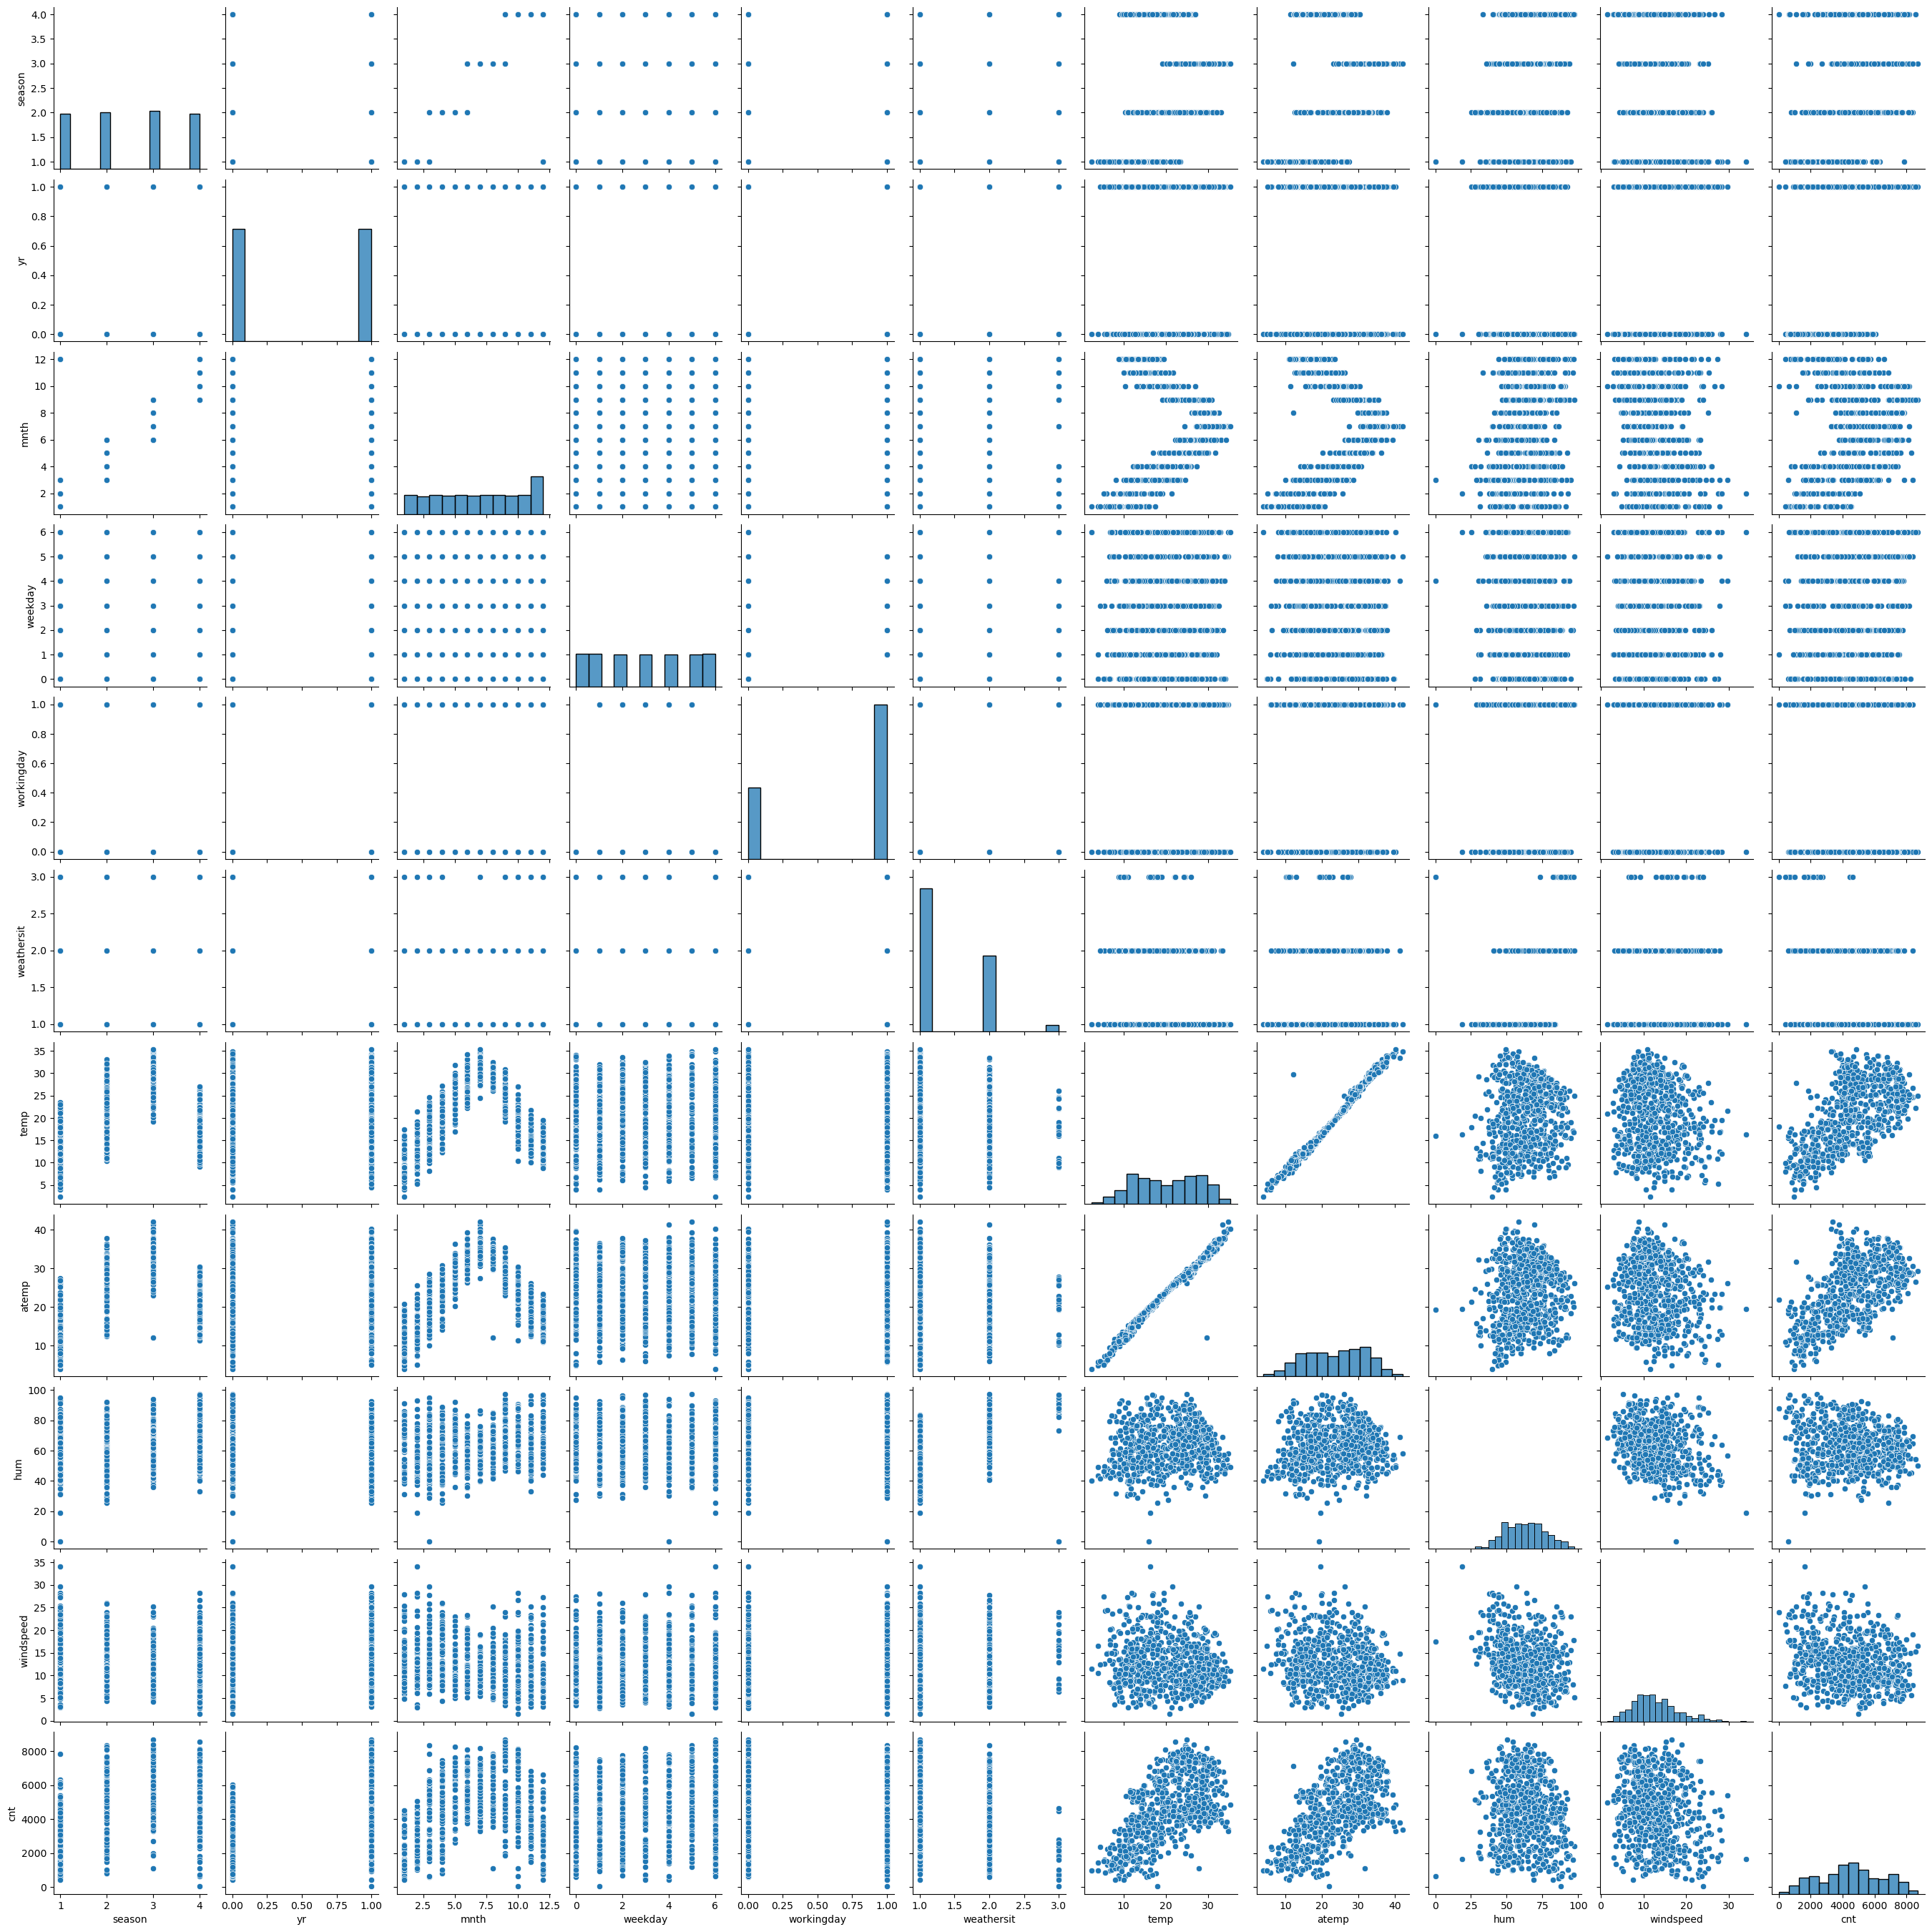

In [17]:
sns.pairplot(df)

In [18]:
# let's check for different seasons (season)

<Axes: xlabel='season', ylabel='cnt'>

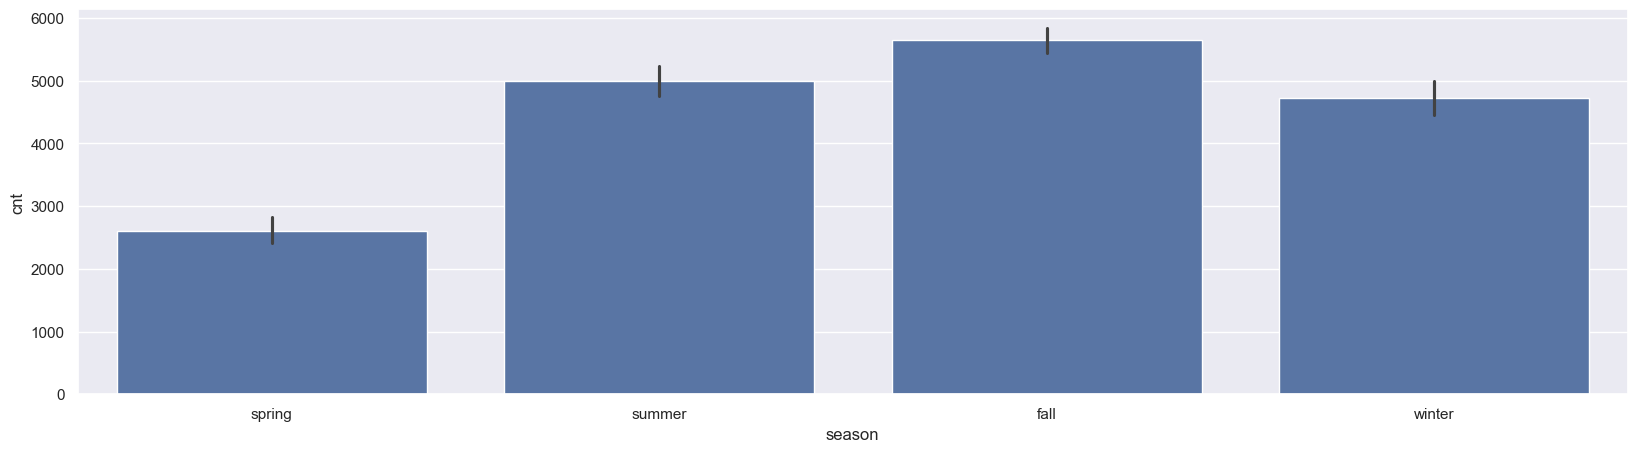

In [19]:
def season_mapping(season_char):
    return season_char.map({1:'spring',2:'summer',3:'fall',4:'winter'})

df[['season']] = df[['season']].apply(season_mapping)

width = 20
height = 5
sns.set(rc = {'figure.figsize':(width,height)})
sns.barplot(data=df, x='season',y='cnt')

basis the visualization from the above graph it looks like Fall season has the maximum cnt/ count (bike rent count)

In [20]:
# similarly let's check which weather has the highest count

<Axes: xlabel='weathersit', ylabel='cnt'>

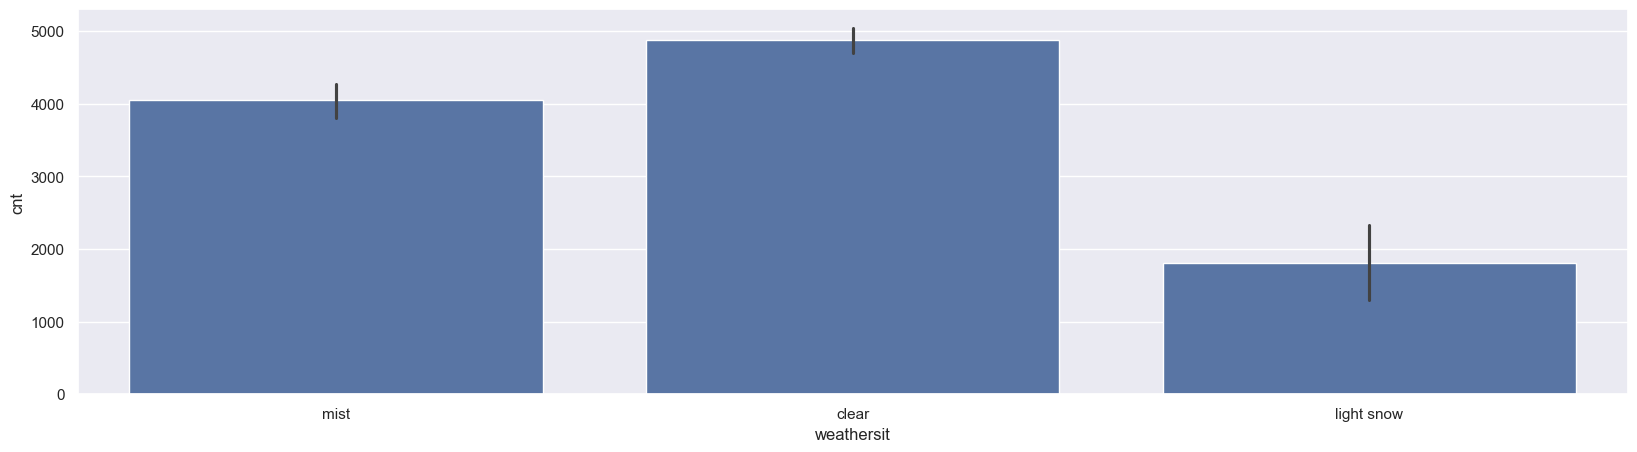

In [21]:
def weather_mapping(weather_char):
    return weather_char.map({1:'clear',2:'mist',3:'light snow',4:'heavy rain'})

df[['weathersit']] = df[['weathersit']].apply(weather_mapping)

width = 20
height = 5
sns.set(rc = {'figure.figsize':(width,height)})
sns.barplot(data=df, x='weathersit',y='cnt')

bike count is high when weather is clear.

In [22]:
# let's see how weather and season effect/ have the highest count

<Axes: xlabel='weathersit', ylabel='cnt'>

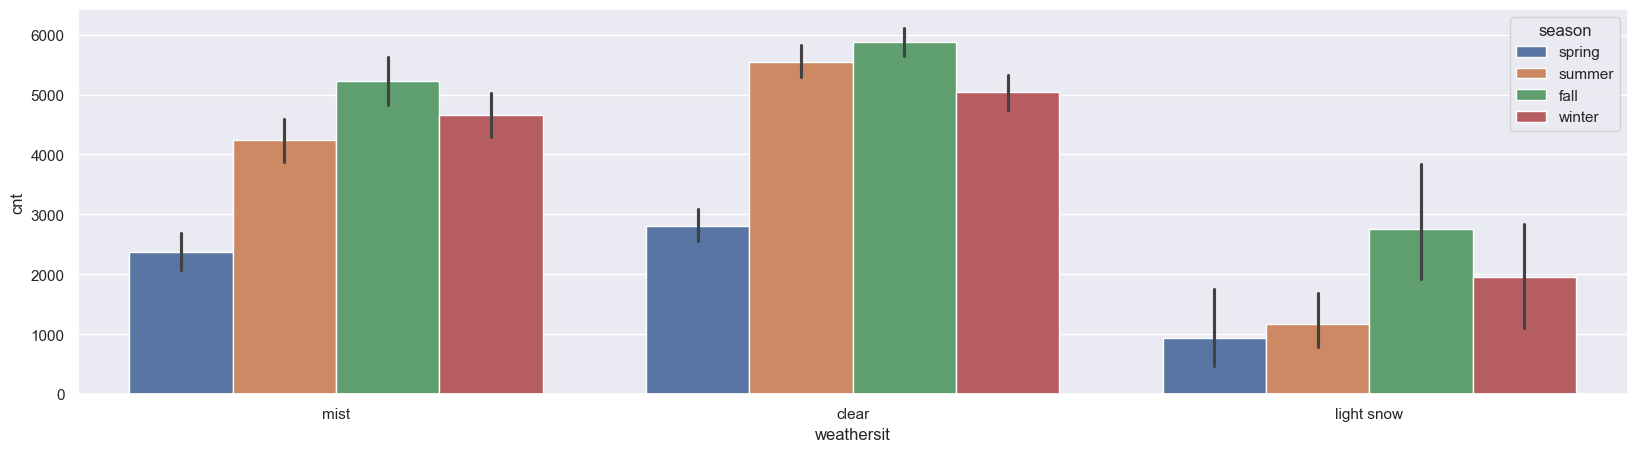

In [23]:
width = 20
height = 5
sns.set(rc = {'figure.figsize':(width,height)})
sns.barplot(data=df, x='weathersit',y='cnt',hue='season')

During fall season when weather is clear cnt is highest

In [24]:
# let's check the bike rent count for different years (yr)

<Axes: xlabel='season', ylabel='cnt'>

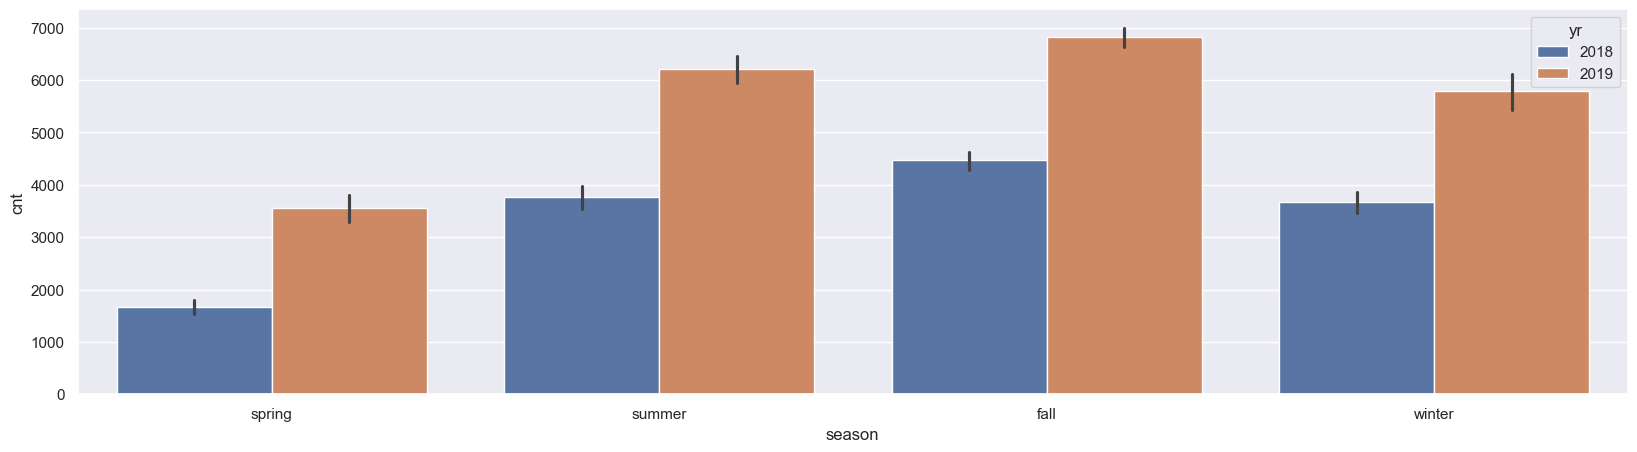

In [25]:
def year_mapping(full_year):
    return full_year.map({0:'2018',1:'2019'})

df[['yr']] = df[['yr']].apply(year_mapping)

width = 20
height = 5
sns.set(rc = {'figure.figsize':(width,height)})
sns.barplot(data=df, x='season',y='cnt',hue='yr')

Even after adding year we can see that season fall has the highest cnt/count (bike rent count) in both the years ie; 2018 and 2019 

In [26]:
# let's see the count and year graph

<Axes: xlabel='yr', ylabel='cnt'>

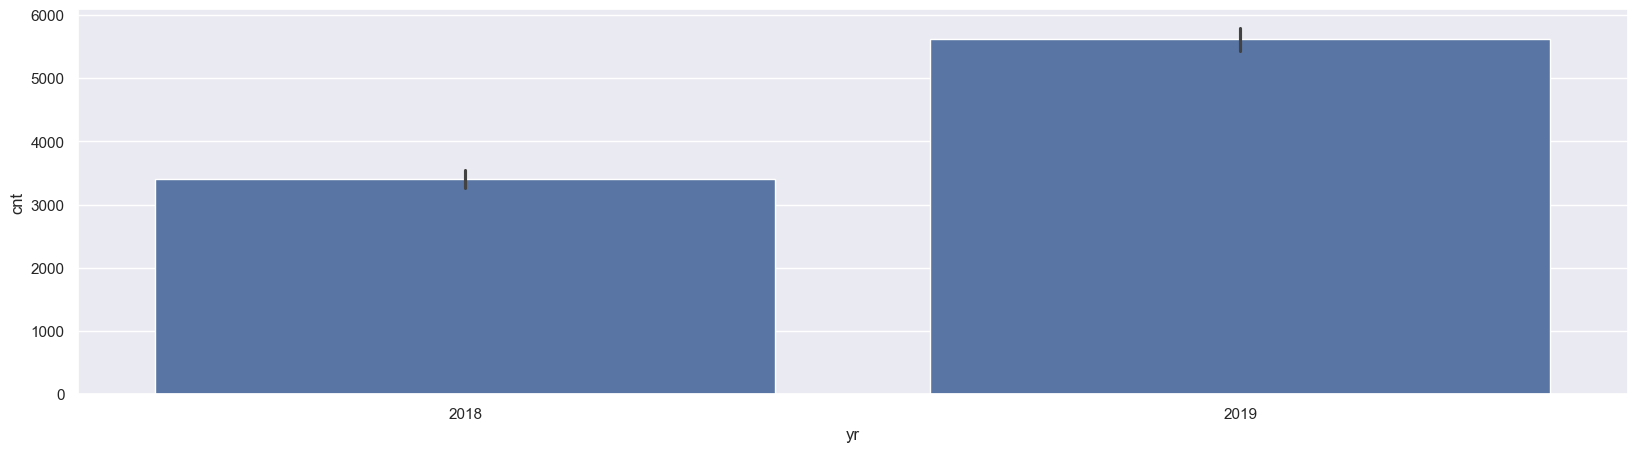

In [27]:
sns.barplot(data=df, x='yr',y='cnt')

year 2019 has  the highest bike rent cnt

In [28]:
# let's check the bike rent count for weekdays (weekday)

<Axes: xlabel='weekday', ylabel='cnt'>

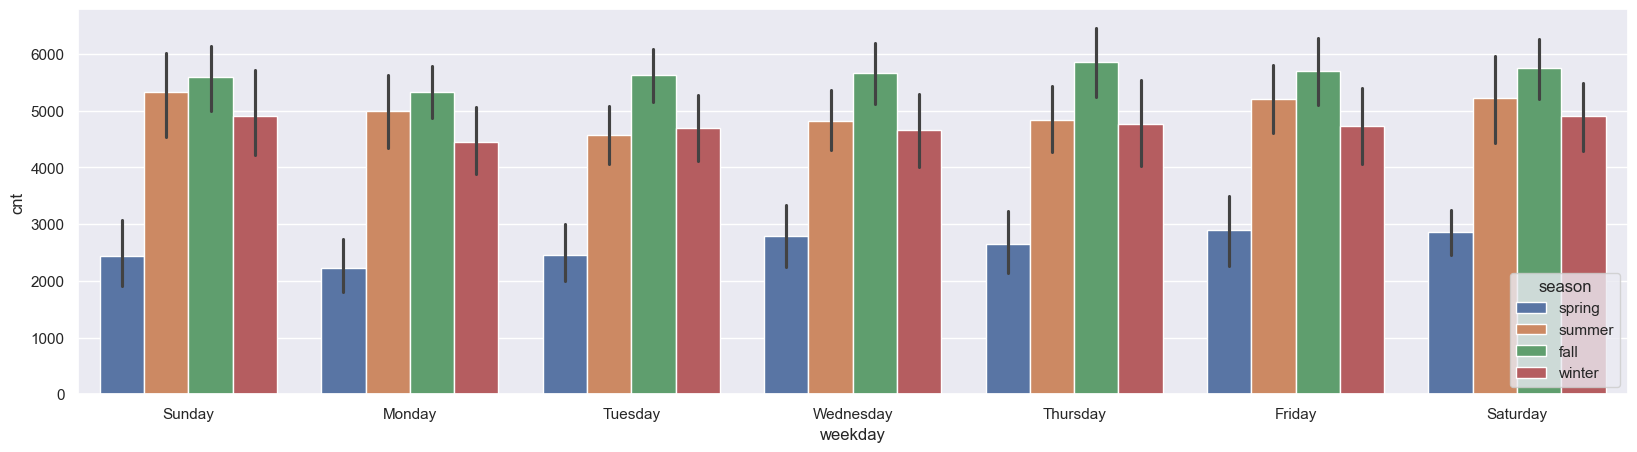

In [29]:
def weekday_mapping(weekday_map):
    return weekday_map.map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})

df[['weekday']] = df[['weekday']].apply(weekday_mapping)

width = 20
height = 5
sns.set(rc = {'figure.figsize':(width,height)})
sns.barplot(data=df, x='weekday',y='cnt',hue='season')

Basis above visualization it's clear that fall has the highest count on all days of week. Highest count on thursday

<Axes: xlabel='mnth', ylabel='cnt'>

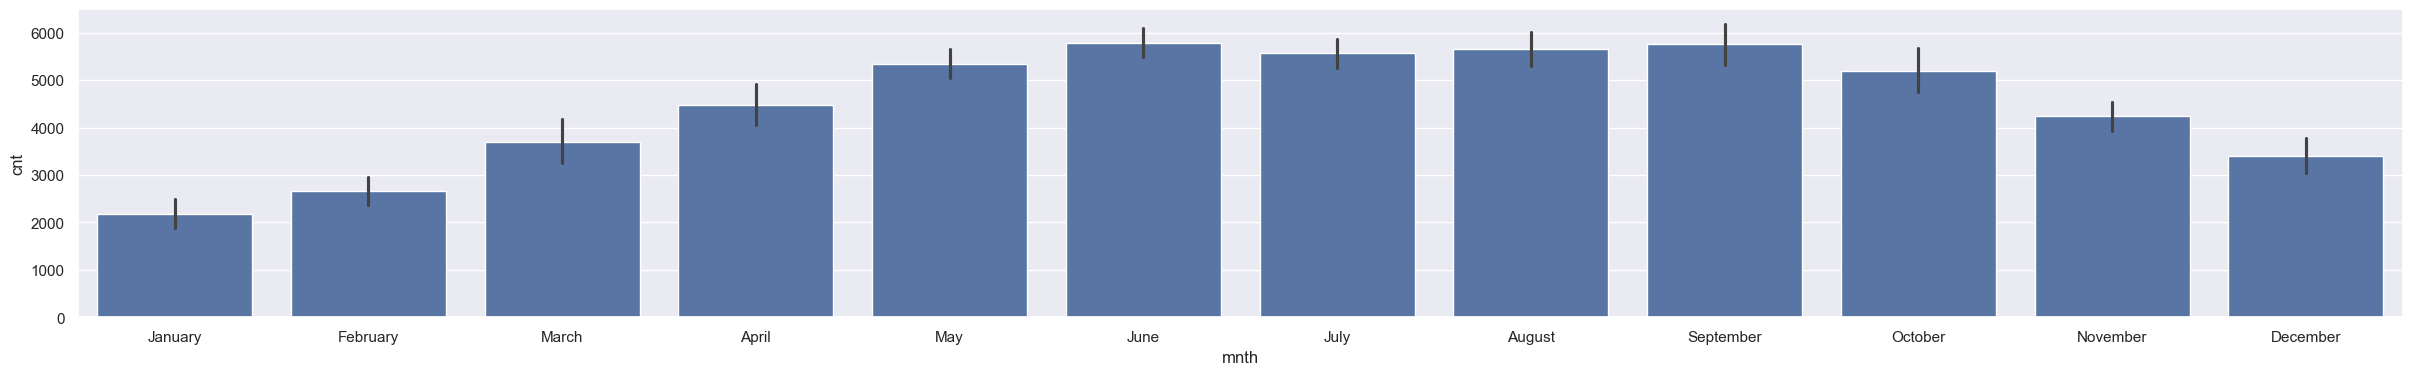

In [30]:
def month_mapping(month_map):
    return month_map.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

df[['mnth']] = df[['mnth']].apply(month_mapping)

width = 30
height = 4
sns.set(rc = {'figure.figsize':(width,height)})
sns.barplot(data=df, x='mnth',y='cnt')

Quite clear that cnt is high for month of june

In [31]:
# lets see how year effects the month and cnt

<Axes: xlabel='mnth', ylabel='cnt'>

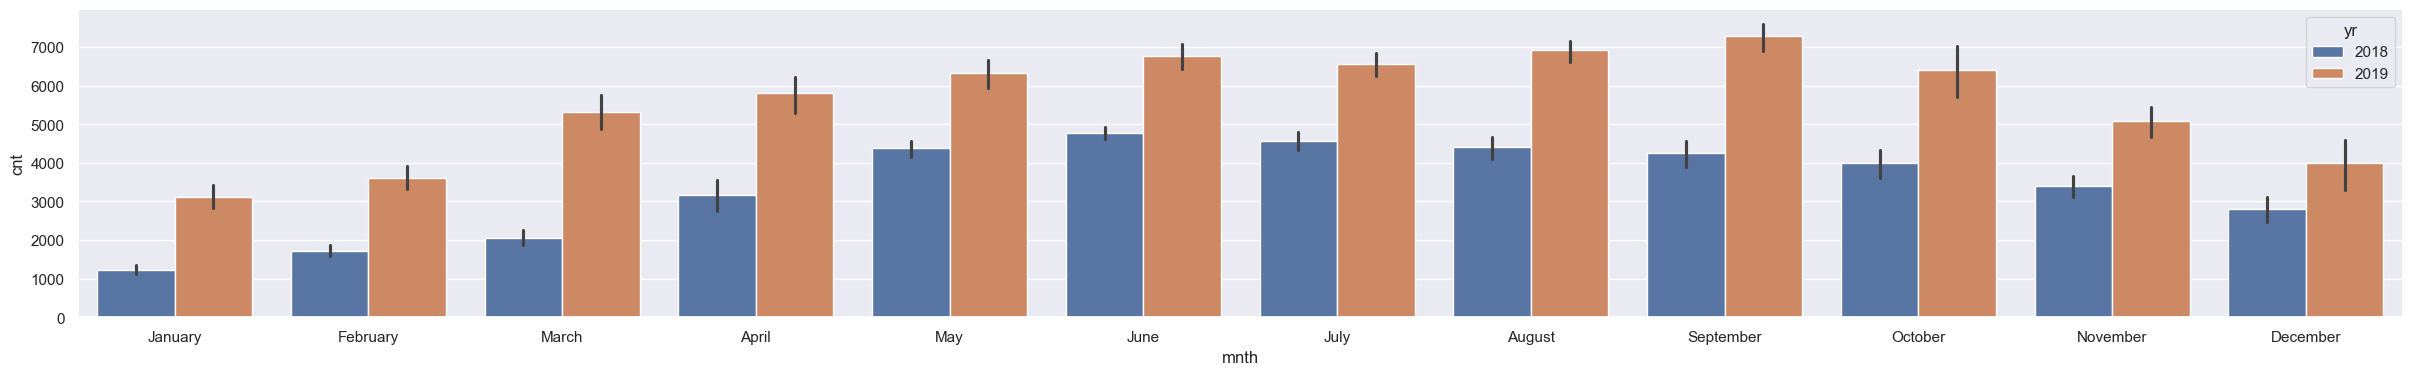

In [32]:
sns.barplot(data=df, x='mnth',y='cnt',hue='yr')

It looks like year had impact on cnt. In 2018 had less cnt compared to 2019. And highest in month of september for 2019

In [33]:
# lets visualize the change in cnt when it's holiday and working day

<Axes: xlabel='workingday', ylabel='cnt'>

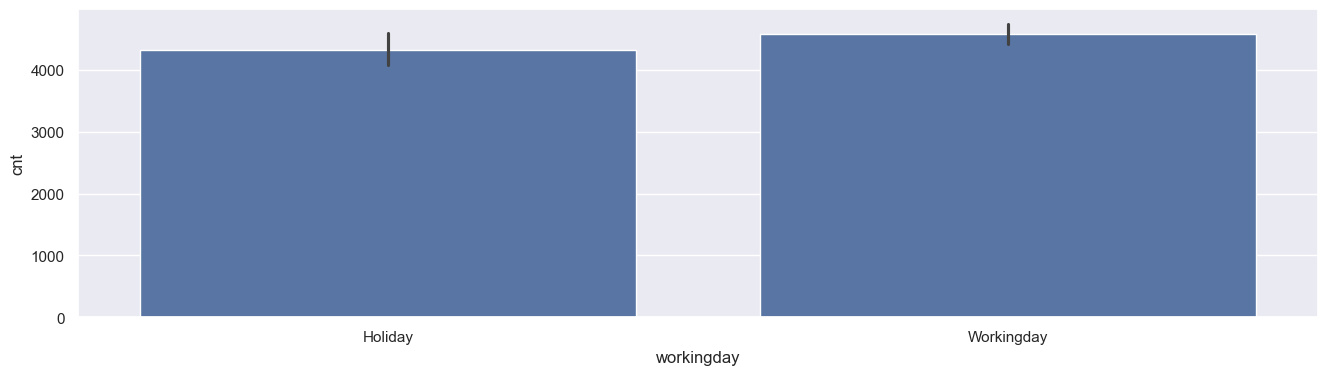

In [34]:
def workingday_mapping(workingday_map):
    return workingday_map.map({0:'Holiday',1:'Workingday'})

df[['workingday']] = df[['workingday']].apply(workingday_mapping)

width = 16
height = 4
sns.set(rc = {'figure.figsize':(width,height)})
sns.barplot(data=df, x='workingday',y='cnt')

Basis the visualization we can say that on working day rent cnt is high 

Categorical variables we have are :-

- season
- weather
- weekday
- month
- year

In [35]:
# now we are clear with categorical variables, lets visualize numerical variables

Numerical variables are :-

- temp
- atemp
- windspeed
- count
- humidity


In [36]:
# temperature vizualization

<Axes: xlabel='atemp', ylabel='Density'>

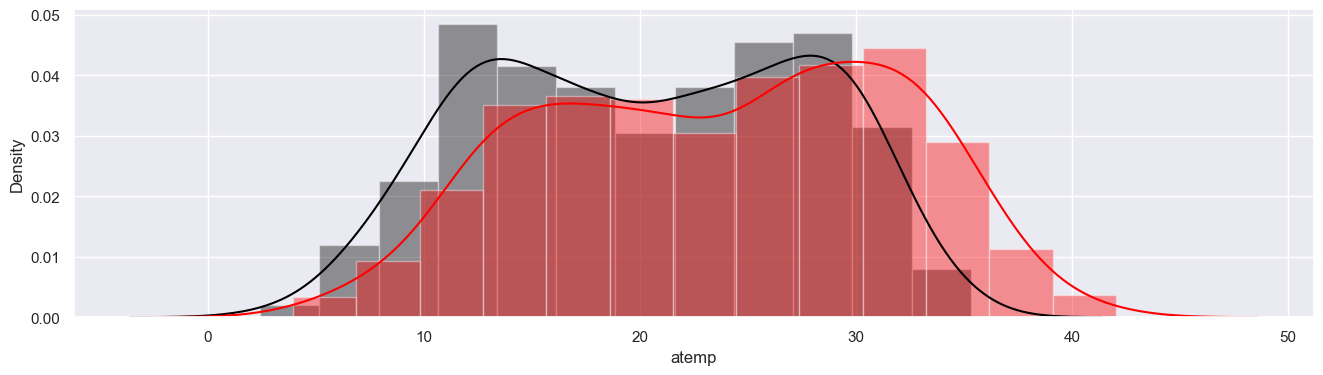

In [37]:
width = 16
height = 4
sns.set(rc = {'figure.figsize':(width,height)})
sns.distplot(df['temp'], color='black')
sns.distplot(df['atemp'], color='red')

In [38]:
# humidity vizualization

<Axes: xlabel='hum', ylabel='Density'>

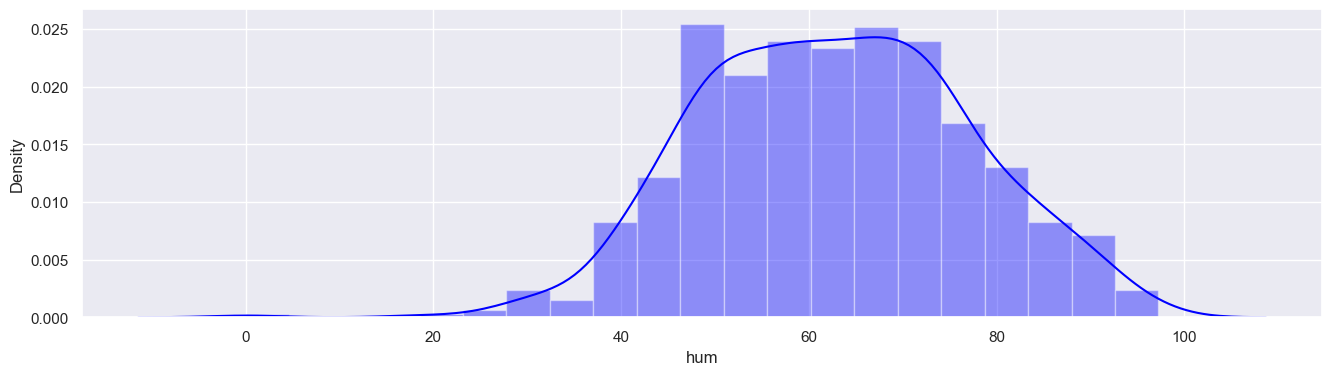

In [39]:
width = 16
height = 4
sns.set(rc = {'figure.figsize':(width,height)})
sns.distplot(df['hum'], color='blue')

In [40]:
#count

<Axes: xlabel='cnt', ylabel='Density'>

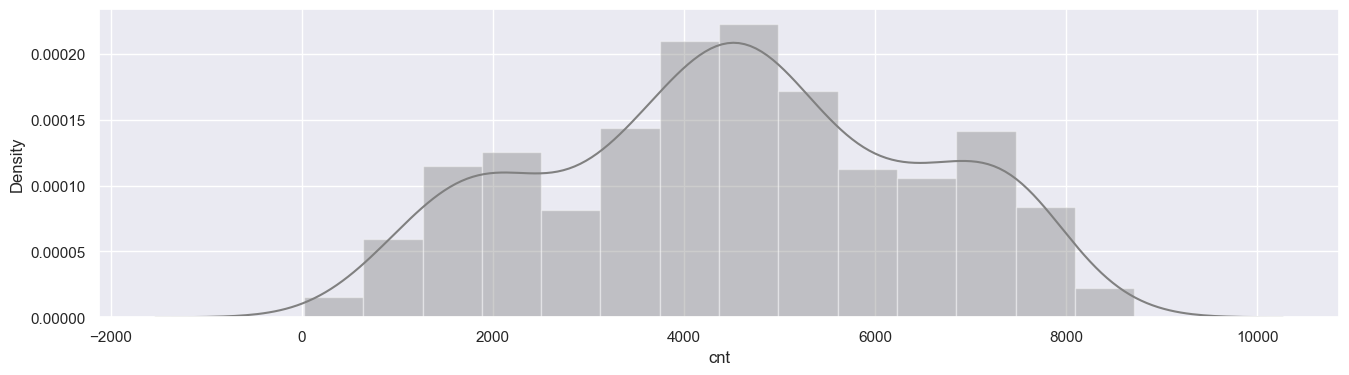

In [41]:
width = 16
height = 4
sns.set(rc = {'figure.figsize':(width,height)})
sns.distplot(df['cnt'], color='grey')

In [42]:
# windspeed

<Axes: xlabel='windspeed', ylabel='Density'>

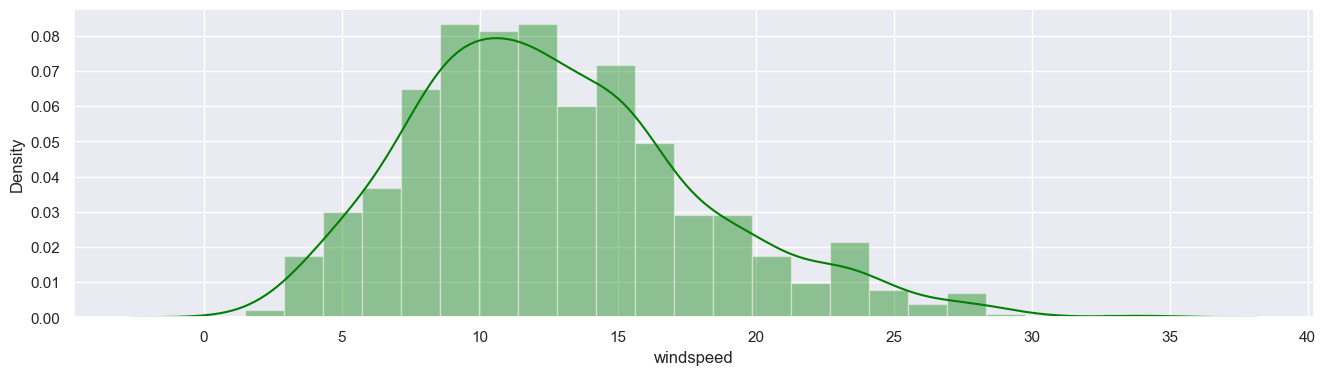

In [43]:
width = 16
height = 4
sns.set(rc = {'figure.figsize':(width,height)})
sns.distplot(df['windspeed'], color='green')

In [44]:
df.rename(columns={'hum':'humidity','cnt':'count','yr':'year','mnth':'month'},inplace=True)

In [45]:
df_categ = df.select_dtypes(exclude=['float64','int64','datetime64'])
df_categ.head()

,season,year,month,weekday,workingday,weathersit
0,spring,2018,January,Sunday,Holiday,mist
1,spring,2018,January,Monday,Holiday,mist
2,spring,2018,January,Tuesday,Workingday,clear
3,spring,2018,January,Wednesday,Workingday,clear
4,spring,2018,January,Thursday,Workingday,clear


In [46]:
var_list = ['temp','atemp','humidity','windspeed','count']
for var in var_list:
    df[var] = df[var].astype('float')

In [47]:
df_num = df.select_dtypes(include=['float64'])

### Step 4 - Visualizing the correlation

In [48]:
# convert string to float
df['count']= df['count'].astype(float)
numvar = ['temp','atemp','humidity','windspeed','count']
for varnum in numvar:
    df[varnum]=df[varnum].astype('float')

In [49]:
df_float_num = df.select_dtypes(include=['float64'])

In [50]:
cor_df_num = df_float_num.corr()
cor_df_num

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
count,0.627044,0.630685,-0.098543,-0.235132,1.000000


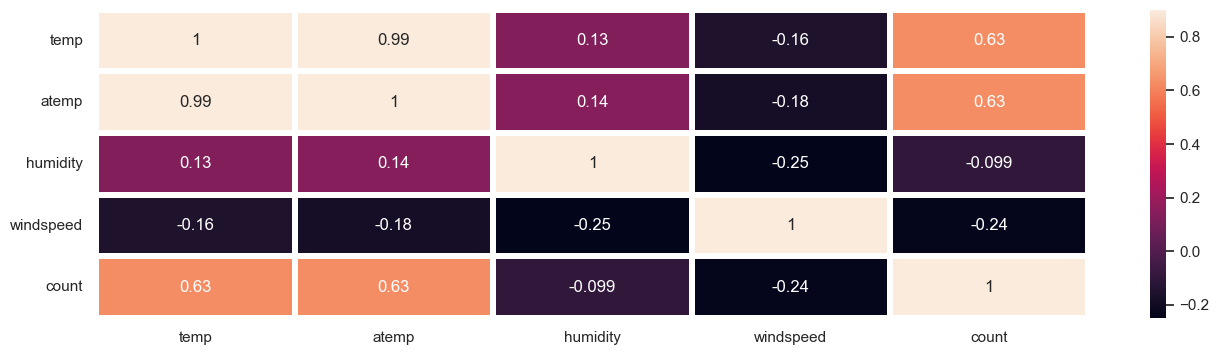

In [51]:
width = 16
height = 4
sns.set(rc = {'figure.figsize':(width,height)})
sns.heatmap(cor_df_num, vmax=0.9, annot=True,linewidths=4);

In [52]:
df.drop('atemp',axis=1,inplace=True)
df.head()

,season,year,month,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,2018,January,Sunday,Holiday,mist,14.110847,80.5833,10.749882,985.0
1,spring,2018,January,Monday,Holiday,mist,14.902598,69.6087,16.652113,801.0
2,spring,2018,January,Tuesday,Workingday,clear,8.050924,43.7273,16.636703,1349.0
3,spring,2018,January,Wednesday,Workingday,clear,8.200000,59.0435,10.739832,1562.0
4,spring,2018,January,Thursday,Workingday,clear,9.305237,43.6957,12.522300,1600.0


### Step 5 - Dummy variable's management

In [53]:
df_dummies = pd.get_dummies(df_categ, drop_first=True, dtype=int)

In [54]:
df_dummies.head()

,season_spring,season_summer,season_winter,year_2019,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Workingday,weathersit_light snow,weathersit_mist
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [55]:
list(df_categ.columns)

['season', 'year', 'month', 'weekday', 'workingday', 'weathersit']

In [56]:
df = df.drop(list(df_categ.columns),axis=1)

In [57]:
df_dummies.head()

,season_spring,season_summer,season_winter,year_2019,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Workingday,weathersit_light snow,weathersit_mist
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [58]:
df = pd.concat([df,df_dummies],axis=1)

In [59]:
df.head()

,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,year_2019,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Workingday,weathersit_light snow,weathersit_mist
0,14.110847,80.5833,10.749882,985.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,14.902598,69.6087,16.652113,801.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,8.050924,43.7273,16.636703,1349.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,8.200000,59.0435,10.739832,1562.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,9.305237,43.6957,12.522300,1600.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


### Step 6 - Prepare train data

In [60]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=0)
print("train shape ",df_train.shape)
print("test shape ",df_test.shape)

train shape  (510, 28)
test shape  (219, 28)


In [61]:

# numerical variables need scaling
numerical_var=['temp','humidity','windspeed','count']
df_train[numerical_var] = scaler.fit_transform(df_train[numerical_var])
df_test[numerical_var]= scaler.transform(df_test[numerical_var])

<Axes: xlabel='temp', ylabel='count'>

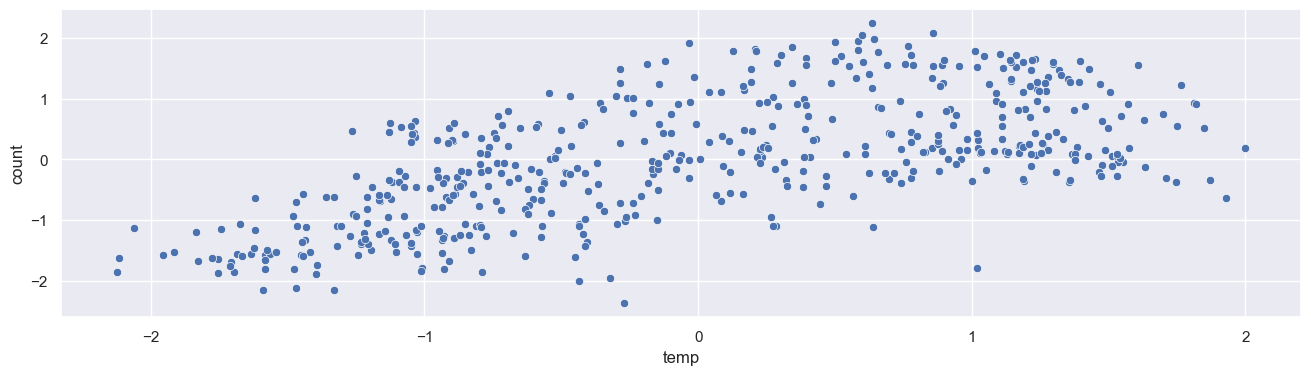

In [62]:
sns.scatterplot(x='temp',y='count',data=df_train)

In [63]:
# divide x and y for train and test

In [64]:
y_train = df_train.pop('count')
X_train = df_train

In [65]:
y_test = df_test.pop('count')
X_test = df_test

### Step 7 - Building Model

In [66]:

#X_train_sm = list(df_float_num)


In [67]:
#lr = sm.OLS(Y_train,X_train_sm).fit()

In [68]:
#lr.summary()

In [69]:
X_train_sm = sm.add_constant(X_train)

In [70]:
lr = sm.OLS(y_train,X_train_sm).fit()

In [71]:
lr.params

const                   -0.480471
temp                     0.484299
humidity                -0.129784
windspeed               -0.120769
season_spring           -0.454605
season_summer           -0.035065
season_winter            0.263263
year_2019                1.025117
month_August            -0.138179
month_December          -0.226813
month_February          -0.199954
month_January           -0.257224
month_July              -0.394739
month_June              -0.159374
month_March              0.028197
month_May                0.147987
month_November          -0.291393
month_October            0.051483
month_September          0.209629
weekday_Monday           0.092716
weekday_Saturday         0.013519
weekday_Sunday           0.279616
weekday_Thursday        -0.007529
weekday_Tuesday         -0.088156
weekday_Wednesday       -0.072799
workingday_Workingday    0.266792
weathersit_light snow   -0.913990
weathersit_mist         -0.203593
dtype: float64

In [72]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     89.52
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          8.24e-169
Time:                        15:23:05   Log-Likelihood:                -266.13
No. Observations:                 510   AIC:                             588.3
Df Residuals:                     482   BIC:                             706.8
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.4805      0.182     -2.636      0.009      -0.839      -0.122
temp                      0.4843      0.052      9.383      0.000       0.383       0.586
humidity                 -0.1298      0.028     -4.641      0.000      -0.185      -0.075
windspeed                -0.1208      0.021     -5.842      0.000      -0.161      -0.080
season_spring            -0.4546      0.141     -3.226      0.001      -0.731      -0.178
season_summer            -0.0351      0.116     -0.303      0.762      -0.263       0.193
season_winter             0.2633      0.136      1.941      0.053      -0.003       0.530
year_2019                 1.0251      0.038     26.649      0.000       0.950       1.101
month_August             -0.1382      0.155     -0.891      0.374      -0.443       0.167
month_December           -0.2268      0.161     -1.413      0.158      -0.542       0.089
month_February           -0.2000      0.154     -1.298      0.195      -0.503       0.103
month_January            -0.2572      0.160     -1.611      0.108      -0.571       0.056
month_July               -0.3947      0.162     -2.438      0.015      -0.713      -0.077
month_June               -0.1594      0.117     -1.360      0.174      -0.390       0.071
month_March               0.0282      0.118      0.240      0.811      -0.203       0.259
month_May                 0.1480      0.096      1.538      0.125      -0.041       0.337
month_November           -0.2914      0.174     -1.671      0.095      -0.634       0.051
month_October             0.0515      0.169      0.305      0.760      -0.280       0.383
month_September           0.2096      0.146      1.431      0.153      -0.078       0.497
weekday_Monday            0.0927      0.135      0.689      0.491      -0.172       0.357
weekday_Saturday          0.0135      0.071      0.190      0.849      -0.126       0.153
weekday_Sunday            0.2796      0.133      2.100      0.036       0.018       0.541
weekday_Thursday         -0.0075      0.069     -0.109      0.913      -0.144       0.129
weekday_Tuesday          -0.0882      0.071     -1.236      0.217      -0.228       0.052
weekday_Wednesday        -0.0728      0.071     -1.031      0.303      -0.212       0.066
workingday_Workingday     0.2668      0.116      2.291      0.022       0.038       0.496
weathersit_light snow    -0.9140      0.146     -6.265      0.000      -1.201      -0.627
weathersit_mist          -0.2036      0.051     -4.007      0.000      -0.303      -0.104
==============================================================================
Omnibus:                       88.048   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.950
Skew:                          -0.844   Prob(JB):       

So we have 
- R-squared:	0.834
- Adj. R-squared:	0.824


Above values look good but we need to make it more fit model. Hence we will drop some variables and again check the value of :-
- R-squared:	?
- Adj. R-squared:	?

### Step 8 - Check for actual and predicted values

In [73]:
L_reg = LinearRegression()

L_reg.fit(X_train, y_train)

LinearRegression()

In [74]:
# predict
y_pred = L_reg.predict(X_test)

In [75]:
df_pred = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})

In [76]:
df_pred

,Actual,Predicted
196,0.760662,-0.074886
187,0.054486,0.092995
14,-1.719706,-1.618250
31,-1.660283,-1.896877
390,-0.219813,-0.442424
...,...,...
155,0.221082,-0.318403
391,-0.548230,-0.608039
571,1.258327,1.041160
306,-0.273400,-0.443277


### Step 9 - Use RFE for feature selection approach

In [77]:
Lin_m = LinearRegression()

In [78]:
Lin_m.fit(X_train,y_train)

LinearRegression()

In [79]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(510, 27)
(219, 27)
(510,)
(219,)


In [80]:
# rfe for sample
Lin_rfe = RFE(Lin_m)
Lin_rfe = Lin_rfe.fit(X_train, y_train)
list(zip(X_train.columns,Lin_rfe.support_,Lin_rfe.ranking_))

[('temp', True, 1),
 ('humidity', False, 5),
 ('windspeed', False, 6),
 ('season_spring', True, 1),
 ('season_summer', False, 11),
 ('season_winter', True, 1),
 ('year_2019', True, 1),
 ('month_August', False, 8),
 ('month_December', True, 1),
 ('month_February', True, 1),
 ('month_January', True, 1),
 ('month_July', True, 1),
 ('month_June', False, 7),
 ('month_March', False, 13),
 ('month_May', False, 3),
 ('month_November', True, 1),
 ('month_October', False, 12),
 ('month_September', True, 1),
 ('weekday_Monday', False, 4),
 ('weekday_Saturday', False, 14),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 15),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 10),
 ('workingday_Workingday', False, 2),
 ('weathersit_light snow', True, 1),
 ('weathersit_mist', True, 1)]

In [81]:
Lin_rfe_supp= X_train.columns[Lin_rfe.support_]
Lin_rfe_supp # list of rfe 

Index(['temp', 'season_spring', 'season_winter', 'year_2019', 'month_December',
       'month_February', 'month_January', 'month_July', 'month_November',
       'month_September', 'weekday_Sunday', 'weathersit_light snow',
       'weathersit_mist'],
      dtype='object')

In [82]:
# train RFE
X_train_rfe = X_train[Lin_rfe_supp]

In [83]:
X_train_rfe.head(10)

,temp,season_spring,season_winter,year_2019,month_December,month_February,month_January,month_July,month_November,month_September,weekday_Sunday,weathersit_light snow,weathersit_mist
235,0.983516,0,0,0,0,0,0,0,0,0,0,0,0
524,1.185393,0,0,1,0,0,0,0,0,0,1,0,0
12,-1.753040,1,0,0,0,0,1,0,0,0,0,0,0
161,1.261660,0,0,0,0,0,0,0,0,0,1,0,0
556,1.216800,0,0,1,0,0,0,1,0,0,0,0,0
502,0.395833,0,0,1,0,0,0,0,0,0,0,0,0
473,0.041423,0,0,1,0,0,0,0,0,0,0,0,0
722,-1.396099,1,0,1,1,0,0,0,0,0,0,0,1
501,0.552845,0,0,1,0,0,0,0,0,0,0,0,0
159,1.710274,0,0,0,0,0,0,0,0,0,0,0,1


### Step 10 - Check VIF

In [84]:
# model building 
def mb(X,y):
    X=sm.add_constant(X)
    lm = sm.OLS(y,X).fit()
    print(lm.summary())
    return X

In [85]:
# vif 
def vif_check(X):
    df_vif = pd.DataFrame()
    df_vif['Features'] = X.columns
    df_vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    df_vif['VIF'] = round(df_vif['VIF'], 2)
    df_vif = df_vif.sort_values(by = "VIF", ascending = False)
    return(df_vif)


In [86]:
# attempt 1 

X_train_new = mb(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     162.5
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.90e-169
Time:                        15:23:06   Log-Likelihood:                -300.39
No. Observations:                 510   AIC:                             628.8
Df Residuals:                     496   BIC:                             688.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.26

So we have (from first attempt)

- R-squared: 0.810
- Adj. R-squared: 0.805

In [87]:
#check vif data for attempt 1
vif_check(X_train_new)

,Features,VIF
0,const,5.11
2,season_spring,3.80
1,temp,3.43
7,month_January,2.23
3,season_winter,2.22
6,month_February,1.94
9,month_November,1.75
5,month_December,1.54
8,month_July,1.30
10,month_September,1.10


In [88]:
# attemp 2
X_train2= X_train_rfe.drop(["weekday_Sunday"], axis = 1) # because p value is above 0.05

In [89]:
X_train_new = mb(X_train2, y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     175.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          3.91e-170
Time:                        15:23:06   Log-Likelihood:                -301.01
No. Observations:                 510   AIC:                             628.0
Df Residuals:                     497   BIC:                             683.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.25

So we have (from first attempt)

- R-squared: 0.809
- Adj. R-squared: 0.805

In [90]:
#check vif data for attempt 2
vif_check(X_train_new)

,Features,VIF
0,const,4.91
2,season_spring,3.80
1,temp,3.43
7,month_January,2.23
3,season_winter,2.22
6,month_February,1.94
9,month_November,1.74
5,month_December,1.54
8,month_July,1.30
10,month_September,1.10


all variables have vif less than 5, which is what we expected

### Step 11 - Residual analysis on train data

In [91]:
lm3 = sm.OLS(y_train,X_train).fit() 

In [92]:
y_train_pred = lm3.predict(X_train)

<Axes: ylabel='Density'>

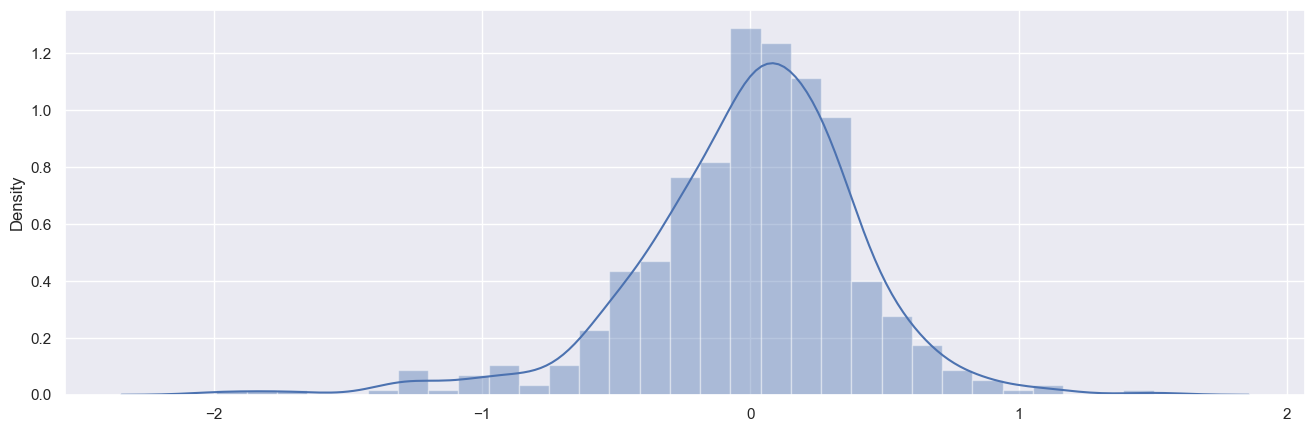

In [93]:
width = 16
height = 5
sns.set(rc = {'figure.figsize':(width,height)})
sns.distplot((y_train - y_train_pred))

### Step 12 - Make prediction based on findings from above model created (test data)

In [94]:
X_train_new.columns

Index(['const', 'temp', 'season_spring', 'season_winter', 'year_2019',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_November', 'month_September', 'weathersit_light snow',
       'weathersit_mist'],
      dtype='object')

In [95]:
X_test_new = X_test[X_train_new]

In [96]:
X_test_new = sm.add_constant(X_test_new)

In [97]:
y_test_pred = lm3.predict(X_test)

### Step 13 - Evaluation of the Model created

Text(0, 0.5, 'y_pred')

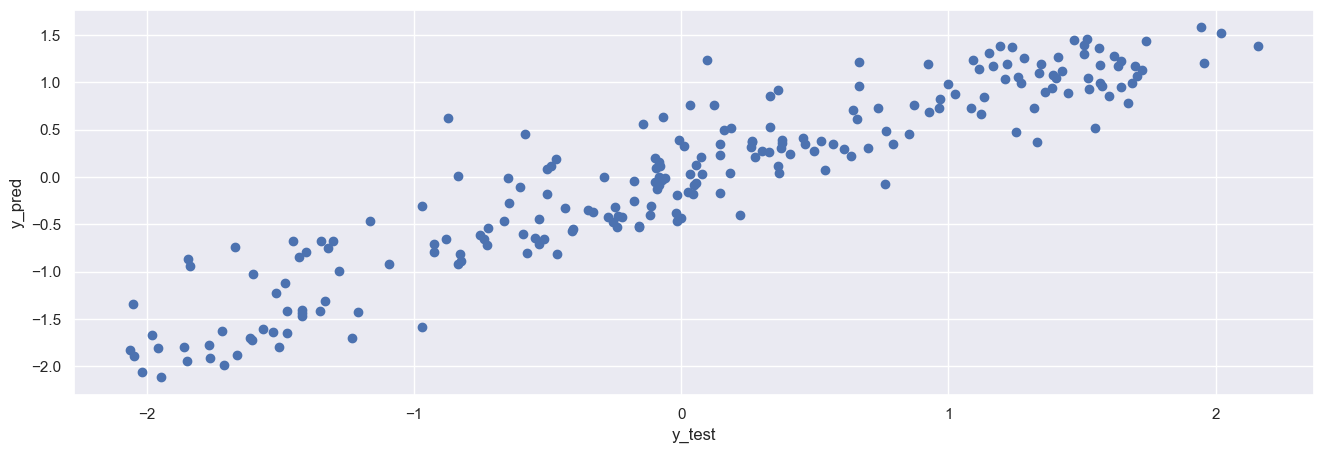

In [98]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [99]:
# rsquared value is 
r2_score(y_test,y_test_pred)

0.86064480694023

### Step 14 - Findings on data based on above steps/ model

Findings based on above model is that :-

- season_spring : -0.4530
- month_September : 0.2132
- temp : 0.4281
- weathersit_light snow : -1.2972
- year_2019 : 1.0602


Above variables are benefiting the Boom Bike's rental count.